## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [55]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')


import matplotlib.pyplot as plt
%matplotlib inline

### 之前做過的處理

In [56]:
# 設定 data_path
dir_data = './data/'
f_app_train = os.path.join(dir_data, 'application_train.csv')
f_app_test = os.path.join(dir_data, 'application_test.csv')

app_train = pd.read_csv(f_app_train)
app_test = pd.read_csv(f_app_test)

from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
# also apply to testing dataset
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

# absolute the value of DAYS_BIRTH
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_test['DAYS_BIRTH'] = abs(app_test['DAYS_BIRTH'])

In [70]:
# 根據貸款信用額度分成不同組別
CRE_data = app_train[['AMT_CREDIT', 'TARGET']] # subset
CRE_data['CRE'] = CRE_data['AMT_CREDIT'] /10000
print(CRE_data['CRE'].describe())


count    307511.000000
mean         59.902600
std          40.249078
min           4.500000
25%          27.000000
50%          51.353100
75%          80.865000
max         405.000000
Name: CRE, dtype: float64


In [85]:
bin_cut=np.linspace(0, 405, 11)
CRE_data['CRE_BIN'] = pd.cut(CRE_data['CRE'], 
                                   bins=bin_cut)
print(CRE_data['CRE_BIN'].value_counts())

(0.0, 40.5]       119468
(40.5, 81.0]      112886
(81.0, 121.5]      48039
(121.5, 162.0]     20596
(162.0, 202.5]      5039
(202.5, 243.0]      1046
(243.0, 283.5]       394
(283.5, 324.0]        23
(364.5, 405.0]        12
(324.0, 364.5]         8
Name: CRE_BIN, dtype: int64


In [86]:
CRE_groups  = CRE_data.groupby('CRE_BIN').mean()
CRE_groups

,AMT_CREDIT,TARGET,CRE
CRE_BIN,,,
"(0.0, 40.5]",2.422512e+05,0.080390,24.225124
"(40.5, 81.0]",5.944135e+05,0.093342,59.441349
"(81.0, 121.5]",9.871960e+05,0.067882,98.719602
"(121.5, 162.0]",1.365952e+06,0.056079,136.595157
"(162.0, 202.5]",1.816198e+06,0.044652,181.619751
"(202.5, 243.0]",2.206988e+06,0.025813,220.698841
"(243.0, 283.5]",2.543340e+06,0.032995,254.333950
"(283.5, 324.0]",3.035340e+06,0.086957,303.534000
"(324.0, 364.5]",3.413981e+06,0.000000,341.398125


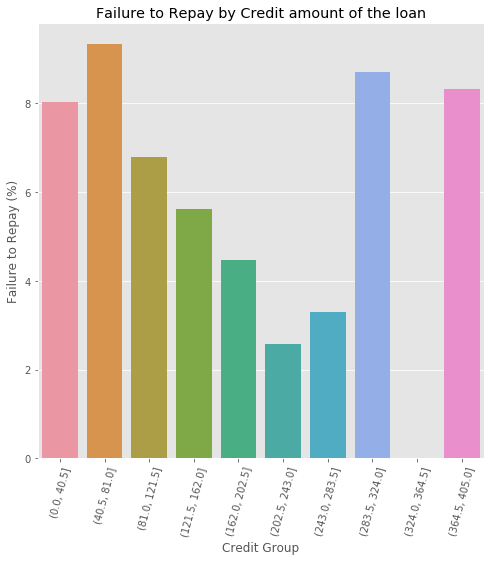

In [87]:
import seaborn as sns # 另一個繪圖-樣式套件

%matplotlib inline
plt.style.use('ggplot')
plt.figure(figsize = (8, 8))

# 以貸款信用額度為 x, target 為 y 繪製 barplot

px = CRE_groups.index
py = 100*CRE_groups['TARGET']
sns.barplot(px, py)

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Credit Group'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Credit amount of the loan');